In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
dataset=pd.read_csv('Data/LogisticReg2.txt',names=['Test 1', 'Test 2', 'Label'])
data=dataset.copy()
dataset.head()

,Test 1,Test 2,Label
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


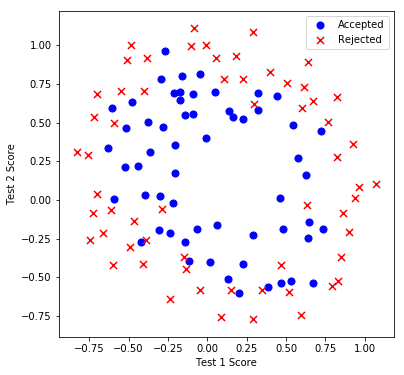

In [3]:
def plotData():
    pos=dataset[dataset['Label'].isin([1])]
    neg=dataset[dataset['Label'].isin([0])]  
    plt.scatter(pos['Test 1'], pos['Test 2'], s=50, c='b', marker='o', label='Accepted')  
    plt.scatter(neg['Test 1'], neg['Test 2'], s=50, c='r', marker='x', label='Rejected')  
    plt.legend()  
    plt.xlabel('Test 1 Score')  
    
    plt.ylabel('Test 2 Score') 
plt.figure(figsize=(6,6))
plotData()

In [4]:
#Feature Mapping
def feature(x1,x2,degree=6):
    out = np.ones( (x1.shape[0], 1) )
    for i in range(1,degree+1):
        for j in range(0,i+1):
            term1 = x1 ** (i-j)
            term2 = x2 ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out  = np.hstack((out, term ))
    return out
degree=6
x1=dataset['Test 1']
x2=dataset['Test 2']
new_data=feature(x1,x2)
new_data.shape

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


(118, 28)

In [5]:
def sigmoid(z):
    g=(1)/(1+np.exp(-z))
    return g

In [6]:
#regularized Cost
def cost(t,X,y,l):
    m=len(y)
    h=sigmoid(X.dot(t))
    reg = (l/2) * (np.sum(np.square(t[1:])))#Skip theta0
    J=-1*(1/m)*(((np.log(h)).T.dot(y)+(np.log(1-h)).T.dot(1-y))+reg)
    return(J)
    

In [7]:
#regularized Gradient
def gradient(t, X, y,l):
    m = y.size
    X=np.array(X)
    h = sigmoid(X.dot(t.reshape(-1,1)))  
    grad = (1/m)*X.T.dot(h-y) + (l/m)*np.r_[[[0]],t[1:].reshape(-1,1)]   
    return(grad.flatten())

In [8]:
t=np.zeros((new_data.shape[1]))  
X = new_data
y = dataset.iloc[:,-1] 
y=np.array(y.values).reshape((len(y),1))
l=1
initial_cost=cost(t,X,y,l)
g=gradient(t,X,y,l)
print("Initial Cost:",initial_cost)
print("Gradient:",g.ravel(),g.shape)

Initial Cost: [0.69314718]
Gradient: [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02] (28,)


In [9]:
import scipy.optimize as opt  
result=opt.fmin_tnc(func=cost, x0=t, fprime=gradient, args=(X, y, l)) 
result

(array([ 1.27422018,  0.62478649,  1.18590377, -2.02173832, -0.91708236,
        -1.41319136,  0.12444366, -0.36770513, -0.36458182, -0.18067776,
        -1.46506512, -0.06288699, -0.61999796, -0.27174433, -1.20129295,
        -0.23663767, -0.20901441, -0.05490416, -0.27804409, -0.29276908,
        -0.4679079 , -1.04396481,  0.02082843, -0.29638539,  0.00961555,
        -0.32917183, -0.13804206, -0.9355084 ]), 56, 4)

In [10]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [11]:
theta_min = np.matrix(result[0])  
predictions = predict(theta_min, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print ('accuracy = {0}%'.format(accuracy)  )

accuracy = 98%


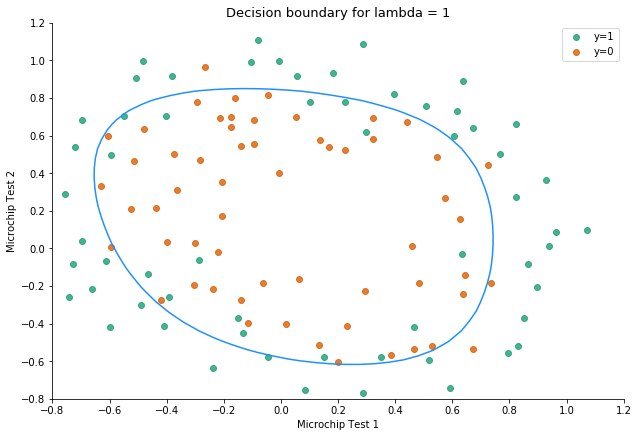

In [12]:
def plot_decision_boundary(theta, X, y):
    # Simple seaborn scatterplot
    sns.lmplot('Test 1','Test 2',hue='Label',data=data,fit_reg=False,size = 6,aspect= 1.5,palette='Dark2',legend=False)
    
    z = np.zeros([50, 50])
    uu = np.linspace(-1.0, 1.5, 50)
    vv = np.linspace(-1.0, 1.5, 50)
    for i, u in enumerate(uu):
        for j, v in enumerate(vv):
            z[i, j] = np.dot(feature(np.array([[u]]), np.array([[v]])), theta)[0]
    plt.contour(uu, vv, z.T, [0], colors='dodgerblue')
    plt.axis([-.8, 1.2, -.8, 1.2])
    plt.xticks(np.arange(-.8, 1.3, .2))
    plt.yticks(np.arange(-.8, 1.3, .2))
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(('y=1', 'y=0'), loc='upper right', numpoints=1)
    plt.title('Decision boundary for lambda = ' + str(l), fontsize=13)
    # plt.savefig('temp.png', transparent=True,orientation='landscape', pad_inches=0.4)


plot_decision_boundary(result[0], X, y)

### Regularized Logistic Regression with scikit-learn

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [14]:
data=pd.read_csv("Data/LogisticReg2.txt",names=['Test1','Test2','Label'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
Test1    118 non-null float64
Test2    118 non-null float64
Label    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [15]:
X=data[['Test1','Test2']]
y=data['Label']

In [20]:
#feature engineering
def feature(x1,x2,degree=6):
    out = np.ones( (x1.shape[0], 1) )
    for i in range(1,degree+1):
        for j in range(0,i+1):
            term1 = x1 ** (i-j)
            term2 = x2 ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out  = np.hstack((out, term ))
    return out
degree=6
x1=data['Test1']
x2=data['Test2']
new_X=feature(x1,x2)
new_X.shape

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


(118, 28)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_X,y,test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82, 28)
(82,)
(36, 28)
(36,)


In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model_fit=model.fit(X_train,y_train)
model.score(X_train,y_train)

0.8048780487804879

In [31]:
from sklearn import metrics
predict=model.predict(X_test)
print(metrics.accuracy_score(y_test,predict))

0.8333333333333334


In [33]:
from sklearn.cross_validation import cross_val_score
#10-fold cross validation
score = cross_val_score(LogisticRegression(), new_X, y, scoring='accuracy', cv=10)
print(score)
print(score.mean())

[0.66666667 0.75       0.91666667 0.25       0.66666667 0.66666667
 1.         0.66666667 0.63636364 0.81818182]
0.7037878787878789


In [35]:
print(metrics.confusion_matrix(y_test, predict))

[[16  3]
 [ 3 14]]


In [36]:
print(metrics.classification_report(y_test, predict))

             precision    recall  f1-score   support

          0       0.84      0.84      0.84        19
          1       0.82      0.82      0.82        17

avg / total       0.83      0.83      0.83        36

